# K Nearest Neighbors sklearn

In this jupyter notebook, as our classifier we will be using self implemented K Nearest Neighbors classifier, which we compare to previously evaluated KNeighborsClassifier model from sklearn library.

### Importing libraries

First, we need to import necessary libraries. For our ML model, we will be using our own implementation of kNN classifier.

In [1]:
import importlib
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import pickle

In [2]:
knn = importlib.import_module('kNN2')

### Data handling

Next, we need to import our input data file, which has already been preprocessed beforehand.

In [3]:
# Load the data file

data = pd.read_csv('../output/data/real_estate_preprocessed.csv')
data = data[['district', 'size', 'floor', 'registration', 'rooms', 'parking', 'balcony', 'state', 'price']]

In [4]:
# Add class labels based on prices, and drop 'prices' column afterwords

classes = list()
for i, d in data.iterrows():
    if d['price'] <= 49999:
        classes.append('<= 49.999')
    elif d['price'] <= 99999:
        classes.append('50.000 - 99.999')
    elif d['price'] <= 149999:
        classes.append('100.000 - 149.999')
    elif d['price'] <= 199999:
        classes.append('150.000 - 199.999')
    else:
        classes.append('>= 200.000')

data.drop(labels=['price'], axis=1, inplace=True)
data = data.assign(target=classes)

Text(0, 0.5, 'Number of apartments')

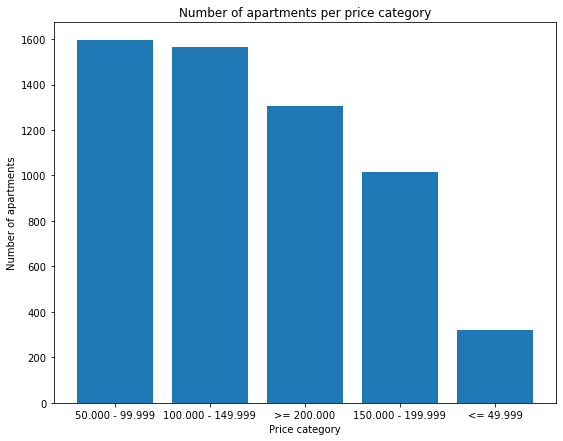

In [5]:
# Visualizing class distribution

plt.figure(figsize=(9,7))
plt.bar(data['target'].value_counts().index, data['target'].value_counts().values)
plt.title('Number of apartments per price category')
plt.xlabel('Price category')
plt.ylabel('Number of apartments')

In [6]:
# Split data into feature vectors and outputs

X = np.array(data.iloc[:, 0:-1])
y = np.array(data.iloc[:, -1:])

In [7]:
# Use OneHotEncoder for categorical features

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [0, 7])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [8]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X.tolist(), y, test_size=0.2, random_state=0)
X_train = csr_matrix(X_train).toarray()
X_test = csr_matrix(X_test).toarray()

In [9]:
# Use StandardScaler to scale train and test inputs

ct2 = ColumnTransformer([('standard_scaler', StandardScaler(), [-3, -5, -6])], remainder='passthrough')
X_train = ct2.fit_transform(X_train)
X_test = ct2.transform(X_test)

### Model training and evaluation

We will be using our own implemenation of K Nearest Neighbors classifier. We will be using classification_report to look at performance metrics (accuracy and f1-score).

In [10]:
# Use self implemented kNN classifier to fit train set and predict test set

classifier = knn.kNN()
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [11]:
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

100.000 - 149.999       0.51      0.59      0.55       324
150.000 - 199.999       0.45      0.32      0.37       206
  50.000 - 99.999       0.57      0.63      0.60       306
        <= 49.999       1.00      0.06      0.12        63
       >= 200.000       0.69      0.79      0.74       261

         accuracy                           0.57      1160
        macro avg       0.64      0.48      0.47      1160
     weighted avg       0.58      0.57      0.55      1160



### Saving model, One Hot Encoder and Scaler

We use pickle to save our model, encoder and scaler, which we will need in our application for further predictions.

In [12]:
with open('../output/knn2/knn.pickle', 'wb') as out:
    pickle.dump(classifier, out)

with open('../output/knn2/ohe.pickle', 'wb') as out:
    pickle.dump(ct, out)

with open('../output/knn2/scaler.pickle', 'wb') as out:
    pickle.dump(ct2, out)